In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [5]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

Some rows in the DataFrame contain null values, so we are removing those rows to ensure data quality.

In [6]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

Currently, there are no duplicate records in the dataset. However, to handle any future data additions that may contain duplicates, we are applying the following step to remove them

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


### Data Cleaning

In [10]:
numeric_columns=df.select_dtypes(include='number').columns
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

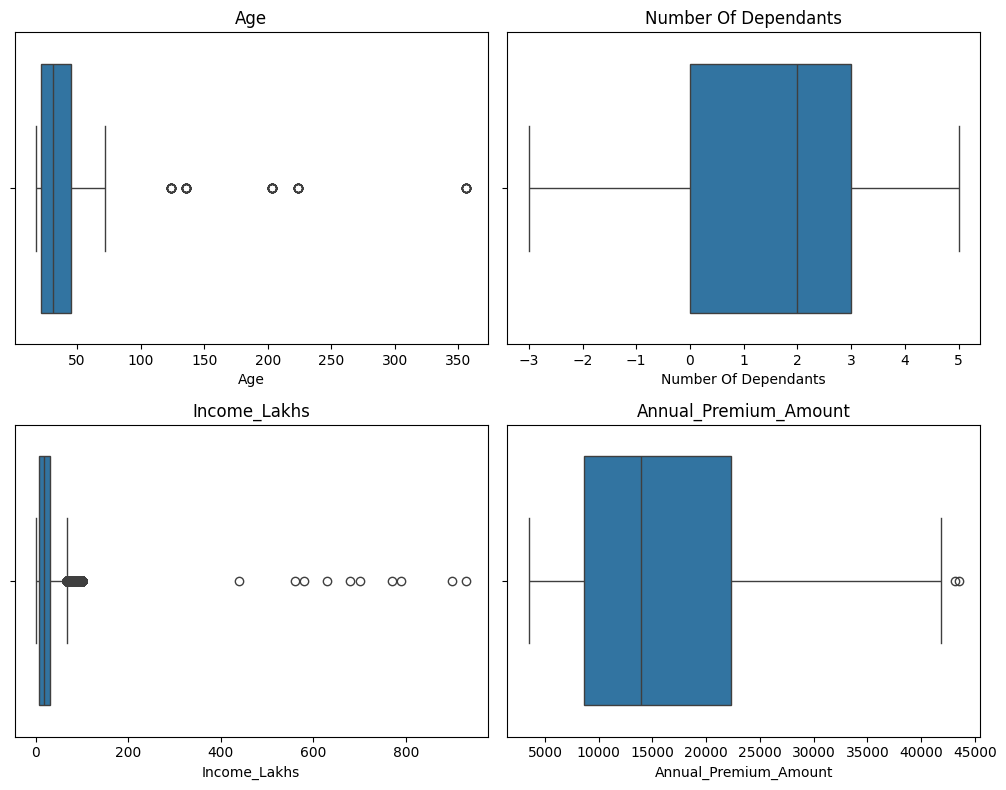

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Values above 100 in the 'age' column are considered outliers and are being removed.

In [12]:
df=df[df.Age<=100]

In [13]:
df.shape

(49918, 13)

In [14]:
df[df['Number Of Dependants']<0]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


Negative values found in the 'Number of Dependents' column are not meaningful, so we are correcting them by taking their absolute values.

In [15]:
df['Number Of Dependants']=df['Number Of Dependants'].abs()

In [16]:
df[df['Number Of Dependants']<0]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount


Although some entries in 'Income_Lakhs' exceed 800 lakhs, values above 100 lakhs are considered outliers by stakeholders, so we are removing them

In [17]:
df[df['Income_Lakhs']>100]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [18]:
df=df[df['Income_Lakhs']<100]

In [19]:
df1=df.copy()

In [20]:
df1[df1['Income_Lakhs']>100]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount


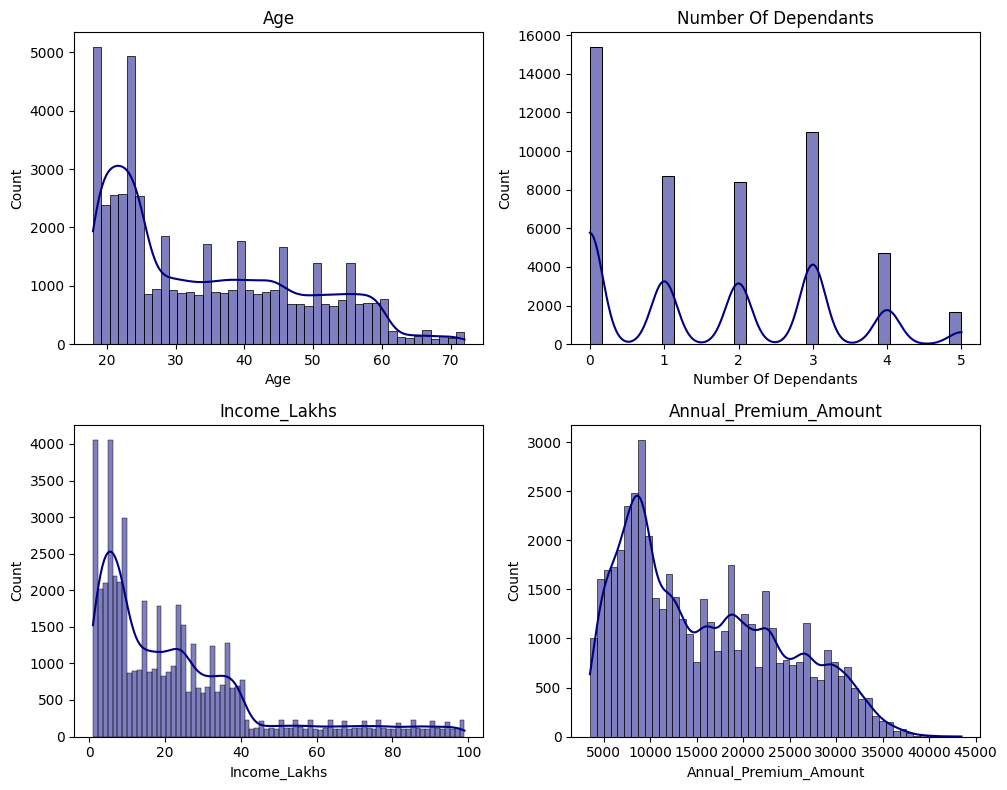

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for iteration
axes = axes.flatten()

# Loop through each column and plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(df1[col], kde=True, ax=axes[i], color='navy')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [22]:
df1.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [23]:
categorical_columns=df1.select_dtypes('object').columns
categorical_columns

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [24]:
for col in categorical_columns:
    print(col, ":", df1[col].unique())

Gender : ['Male' 'Female']
Region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status : ['Unmarried' 'Married']
BMI_Category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Employment_Status : ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Medical History : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan : ['Bronze' 'Silver' 'Gold']


Multiple values in the 'Smoking_Status' column (e.g., 'Does Not Smoke', 'Smoking=0', 'Not Smoking') represent non-smoking. We're standardizing them to a single label

In [25]:
df1['Smoking_Status']=df1['Smoking_Status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
})

In [26]:
df1['Smoking_Status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [27]:
fm_pct=df1['Gender'].value_counts(normalize=True)*100
fm_pct

Gender
Male      54.95302
Female    45.04698
Name: proportion, dtype: float64

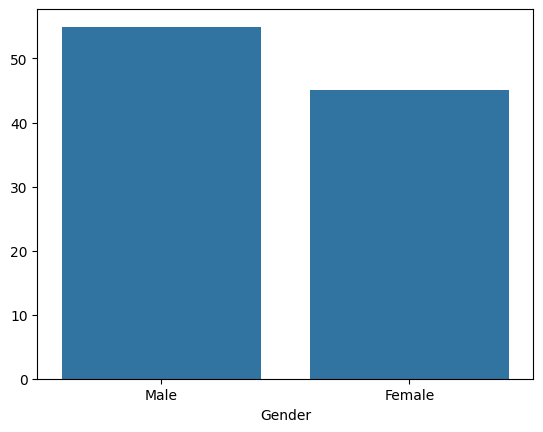

In [28]:
sns.barplot(x=fm_pct.index,y=fm_pct.values)
plt.show()

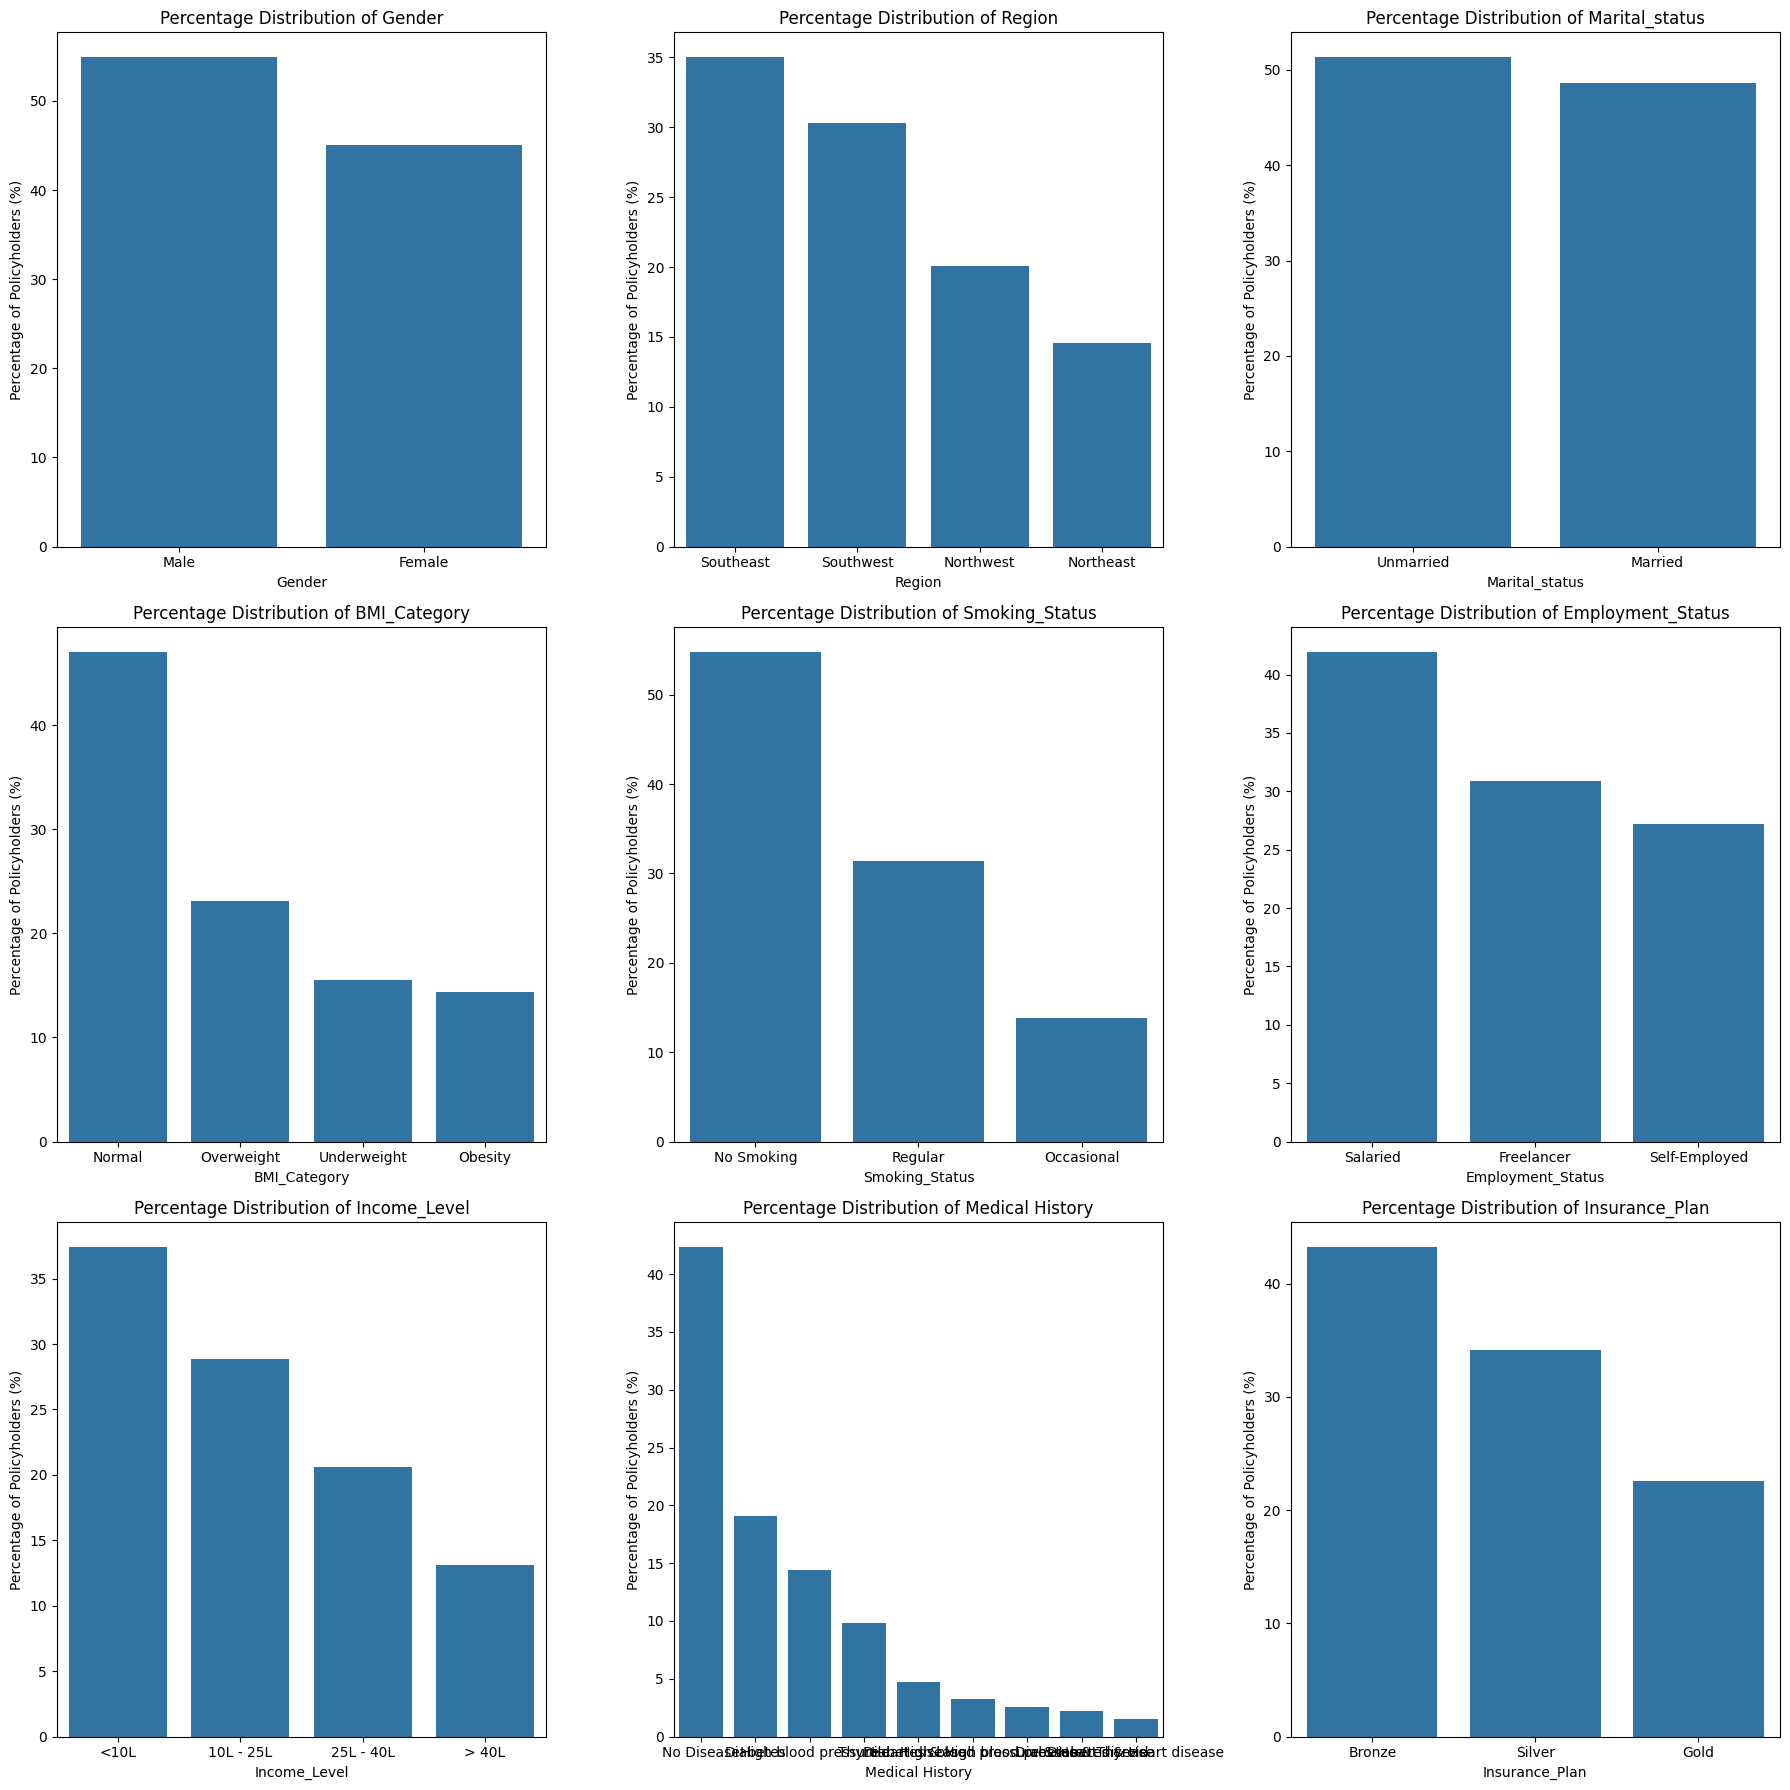

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_columns):
    # Calculate the percentage distribution of each category
    category_counts = df1[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [30]:
crosstab=pd.crosstab(df['Income_Level'],df['Insurance_Plan'])
crosstab

Insurance_Plan,Bronze,Gold,Silver
Income_Level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,326,3593,2604


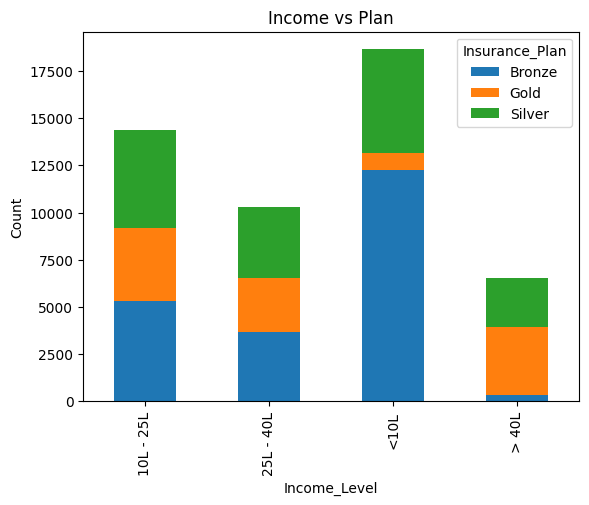

In [31]:
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

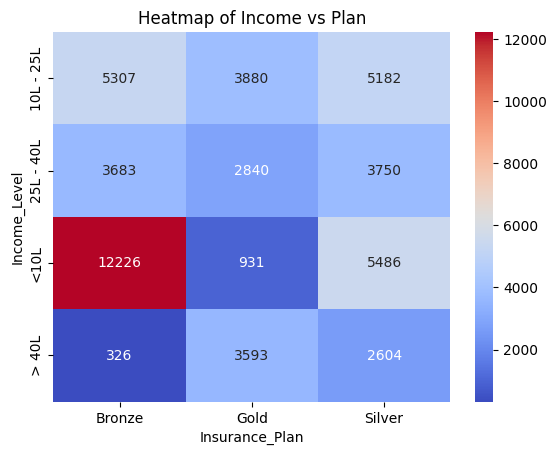

In [32]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

In [33]:
df1.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


### Feature Engineering

In [34]:
df1[['disease1','disease2']]=df1['Medical History'].str.split('&',expand=True).apply(lambda x:x.str.lower())

In [35]:
df2=df1.copy()

In [36]:
df2.shape

(49808, 15)

In [37]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [38]:
df2[['disease1', 'disease2']] = df2['Medical History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\pruth\AppData\Local\Temp\ipykernel_15144\3374047064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\pruth\AppData\Local\Temp\ipykernel_15144\3374047064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


### Encode Text Columns

In [39]:
categorical_columns

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [40]:
df2['Insurance_Plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [41]:
df2['Insurance_Plan']=df2['Insurance_Plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [42]:
df2['Income_Level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [43]:
df2['Income_Level']=df2['Income_Level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [44]:
nominal_columns = ['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status', 'Employment_Status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)

In [45]:
df3.shape

(49808, 23)

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49808 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              49808 non-null  int64  
 1   Number Of Dependants             49808 non-null  int64  
 2   Income_Level                     49808 non-null  int64  
 3   Income_Lakhs                     49808 non-null  int64  
 4   Medical History                  49808 non-null  object 
 5   Insurance_Plan                   49808 non-null  int64  
 6   Annual_Premium_Amount            49808 non-null  int64  
 7   disease1                         49808 non-null  object 
 8   disease2                         49808 non-null  object 
 9   total_risk_score                 49808 non-null  int64  
 10  normalized_risk_score            49808 non-null  float64
 11  Gender_Male                      49808 non-null  int64  
 12  Region_Northwest       

### Feature Selection

In [47]:
df4 = df3.drop(['Medical History','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)              

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
df4.columns

Index(['Age', 'Number Of Dependants', 'Income_Level', 'Income_Lakhs',
       'Insurance_Plan', 'Annual_Premium_Amount', 'normalized_risk_score',
       'Gender_Male', 'Region_Northwest', 'Region_Southeast',
       'Region_Southwest', 'Marital_status_Unmarried', 'BMI_Category_Obesity',
       'BMI_Category_Overweight', 'BMI_Category_Underweight',
       'Smoking_Status_Occasional', 'Smoking_Status_Regular',
       'Employment_Status_Salaried', 'Employment_Status_Self-Employed'],
      dtype='object')

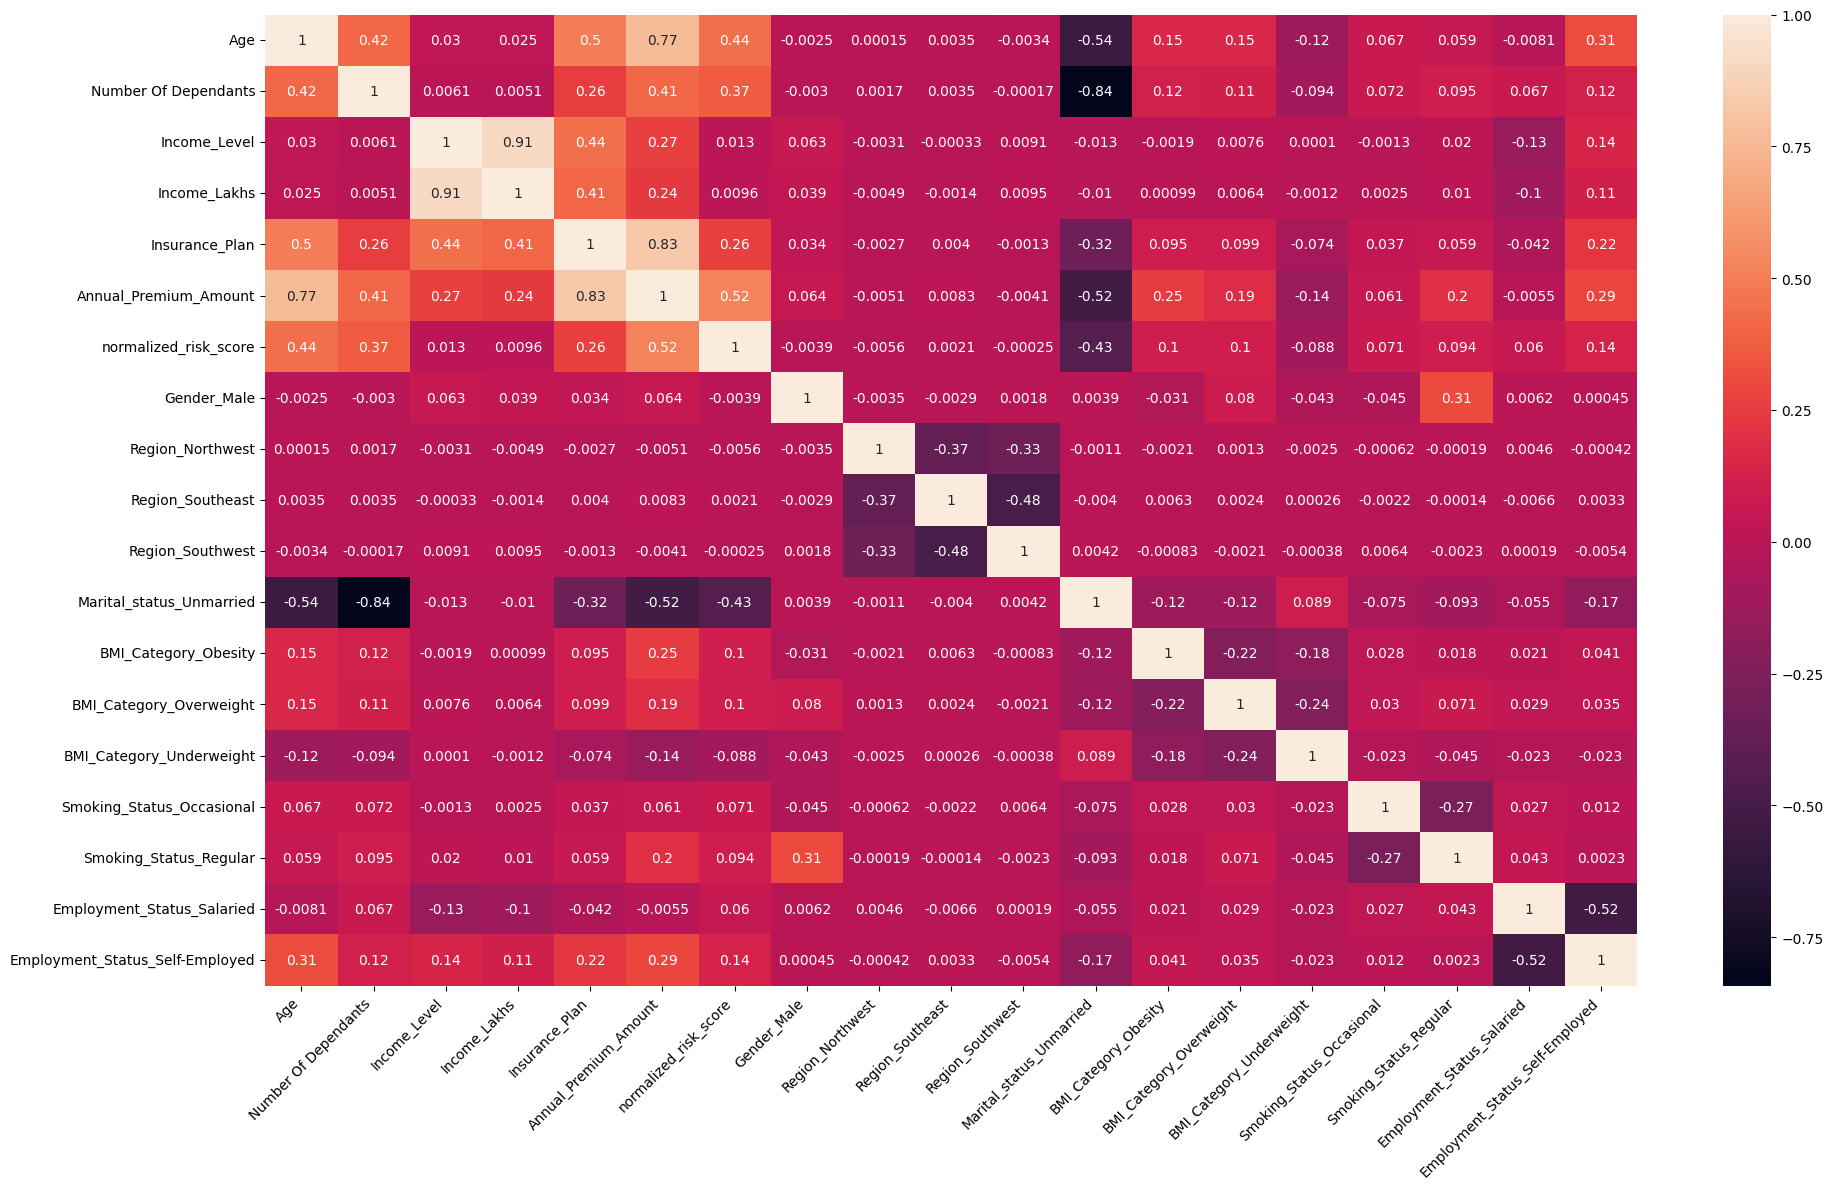

In [49]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [50]:
X=df4.drop('Annual_Premium_Amount',axis=1)
y=df['Annual_Premium_Amount']

In [51]:
df4.columns

Index(['Age', 'Number Of Dependants', 'Income_Level', 'Income_Lakhs',
       'Insurance_Plan', 'Annual_Premium_Amount', 'normalized_risk_score',
       'Gender_Male', 'Region_Northwest', 'Region_Southeast',
       'Region_Southwest', 'Marital_status_Unmarried', 'BMI_Category_Obesity',
       'BMI_Category_Overweight', 'BMI_Category_Underweight',
       'Smoking_Status_Occasional', 'Smoking_Status_Regular',
       'Employment_Status_Salaried', 'Employment_Status_Self-Employed'],
      dtype='object')

In [52]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age','Number Of Dependants', 'Income_Level',  'Income_Lakhs', 'Insurance_Plan']
scaler = MinMaxScaler()

X[columns_to_scale]=scaler.fit_transform(X[columns_to_scale])

In [53]:
X.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
count,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000,49808.000000
mean,0.303691,0.343443,0.364627,0.221787,0.396623,0.291816,0.549530,0.200972,0.350365,0.302963,0.513693,0.143250,0.231148,0.155276,0.138291,0.313765,0.419471,0.272004
std,0.253393,0.298411,0.348905,0.223692,0.392273,0.287456,0.497546,0.400731,0.477089,0.459544,0.499817,0.350331,0.421571,0.362171,0.345209,0.464027,0.493477,0.444997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.153061,0.500000,0.357143,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.306122,0.500000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [55]:
calculate_vif(X)

,Column,VIF
0,Age,4.568203
1,Number Of Dependants,4.533619
2,Income_Level,12.609918
3,Income_Lakhs,11.390919
4,Insurance_Plan,3.574805
5,normalized_risk_score,2.686553
6,Gender_Male,2.420908
7,Region_Northwest,2.101878
8,Region_Southeast,2.921178
9,Region_Southwest,2.669438


The columns 'Income_Level' and 'Income_Lakhs' are highly collinear, meaning they carry overlapping information. To avoid multicollinearity issues, we are removing the 'Income_Level' column

In [56]:
calculate_vif(X.drop('Income_Level', axis="columns"))

,Column,VIF
0,Age,4.546399
1,Number Of Dependants,4.526213
2,Income_Lakhs,2.487302
3,Insurance_Plan,3.438176
4,normalized_risk_score,2.686293
5,Gender_Male,2.409383
6,Region_Northwest,2.100181
7,Region_Southeast,2.918617
8,Region_Southwest,2.667140
9,Marital_status_Unmarried,3.396399


We observed that there are no columns with high correlation between each other, so no further action is required for multicollinearity.

In [57]:
X_reduced = X.drop('Income_Level', axis="columns")

### Model Training

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.30,random_state=18)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34865, 17)
x test:  (14943, 17)
y train:  (34865,)
y test:  (14943,)


### Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)

train_score,test_score

(0.9273547307653065, 0.9298928155514983)

In [60]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  4992482.217100518 RMSE:  2234.3863177840394


In [61]:
model_lr.coef_

array([11248.37151766,  -571.8524674 ,  -398.90714535, 12490.73405457,
        4872.9413452 ,   144.90334637,   -51.33672916,    32.03562362,
         -25.26479672,  -827.07473499,  3342.28752965,  1616.19002419,
         351.15788695,   706.99663729,  2262.15607558,   163.15629116,
         400.38747067])

In [62]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_lr.coef_
})

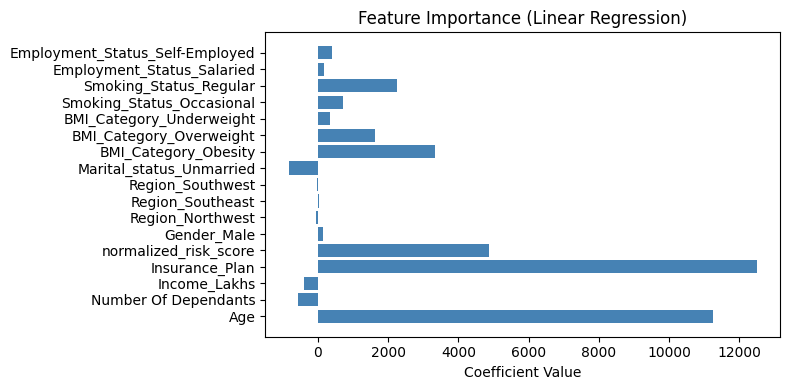

In [63]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression)')
plt.tight_layout()
plt.show()

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

model_rfr=RandomForestRegressor()

model_rfr.fit(X_train,y_train)

model_rfr.score(X_test,y_test)

0.9795589617190187

In [65]:
y_pred = model_rfr.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfrr = np.sqrt(mse_lr)
print("Random Forest ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Random Forest ==> MSE:  4992482.217100518 RMSE:  2234.3863177840394


### XGBoost

In [66]:
from xgboost import XGBRFRegressor

model_xgb=XGBRFRegressor()

model_xgb.fit(X_train,y_train)

model_xgb.score(X_test,y_test)

0.9637908935546875

In [67]:
model_xgb=XGBRFRegressor()

params={
    'n_estimators':[20,40,50],
    'max_depth':[5,10,20]
    
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

model_RSC=RandomizedSearchCV(model_xgb,params,cv=4,n_iter=5)

In [69]:
model_RSC.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [20, 40, 50]})

In [70]:
model_RSC.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [71]:
model_RSC.best_params_

{'n_estimators': 50, 'max_depth': 10}

In [72]:
model_RSC.best_score_

np.float64(0.9809300303459167)

In [73]:
best_model=model_RSC.best_estimator_

In [74]:
best_model.feature_importances_

array([3.8696695e-02, 4.1581250e-05, 1.1735801e-03, 9.3886310e-01,
       5.4409998e-03, 6.8863112e-05, 4.7962076e-05, 4.2984349e-05,
       4.5962770e-05, 9.3333823e-05, 5.0920169e-03, 1.5501187e-03,
       6.8063593e-05, 2.1115446e-04, 8.4764250e-03, 4.3354186e-05,
       4.3794469e-05], dtype=float32)

In [75]:
y_pred=best_model.predict(X_test)

### Error Analysis

In [76]:
residuals=y_pred-y_test
residuals_pct=((residuals/y_test)*100).round(2)

In [77]:
results_df=pd.DataFrame(
    {
        'actual':y_test,
        'predicted':y_pred,
        'diff':residuals,
        'diff_pct':residuals_pct
        
    }
)

In [78]:
results_df

,actual,predicted,diff,diff_pct
7218,8667,6482.837402,-2184.162598,-25.20
44697,13344,10809.457031,-2534.542969,-18.99
5425,4978,6516.307617,1538.307617,30.90
14624,22450,22251.802734,-198.197266,-0.88
30261,18476,18020.347656,-455.652344,-2.47
...,...,...,...,...
46852,25625,26190.632812,565.632812,2.21
10119,4237,6446.488770,2209.488770,52.15
10927,27064,26383.662109,-680.337891,-2.51
12667,11541,10178.780273,-1362.219727,-11.80


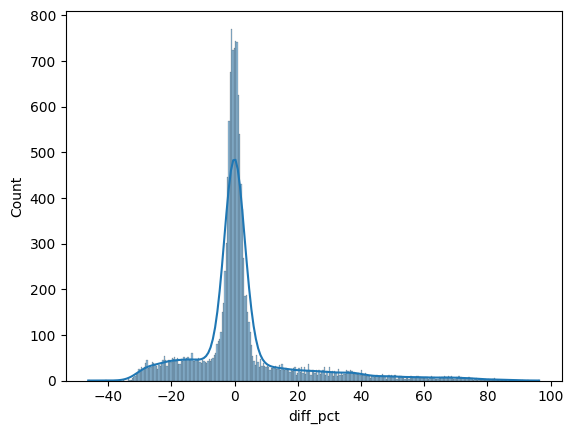

In [79]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [80]:
extreme_error_threshold=10

extreme_results_df=results_df[results_df['diff_pct'].abs()>extreme_error_threshold]

extreme_results_df

,actual,predicted,diff,diff_pct
7218,8667,6482.837402,-2184.162598,-25.20
44697,13344,10809.457031,-2534.542969,-18.99
5425,4978,6516.307617,1538.307617,30.90
34335,4496,6545.649902,2049.649902,45.59
20827,8528,6636.115234,-1891.884766,-22.18
...,...,...,...,...
4092,7970,10762.778320,2792.778320,35.04
16131,4114,6653.842773,2539.842773,61.74
3776,5903,6524.509277,621.509277,10.53
10119,4237,6446.488770,2209.488770,52.15


In [81]:
extreme_results_df.shape

(4336, 4)

In [82]:
results_df.shape

(14943, 4)

In [83]:
extreme_results_df.shape[0]/results_df.shape[0]*100

29.016931004483702

In [84]:
results_df[results_df['diff_pct'].abs()>50]

,actual,predicted,diff,diff_pct
17851,3937,6907.794922,2970.794922,75.46
29817,4147,6656.128906,2509.128906,60.50
21652,3951,6453.532227,2502.532227,63.34
6886,3671,6589.454102,2918.454102,79.50
35795,3728,6556.528320,2828.528320,75.87
...,...,...,...,...
32540,4648,7082.312012,2434.312012,52.37
47906,4363,7259.849121,2896.849121,66.40
16068,4728,7356.214844,2628.214844,55.59
16131,4114,6653.842773,2539.842773,61.74


In [85]:
extreme_errors_df=X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,Age,Number Of Dependants,Income_Lakhs,Insurance_Plan,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
7218,0.018519,0.4,0.071429,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
44697,0.074074,0.2,0.163265,0.5,0.0,1,0,0,1,1,0,0,0,0,1,0,0
5425,0.000000,0.4,0.040816,0.0,0.0,1,0,1,0,1,0,0,0,0,0,1,0
34335,0.037037,0.4,0.010204,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1
20827,0.129630,0.0,0.112245,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0


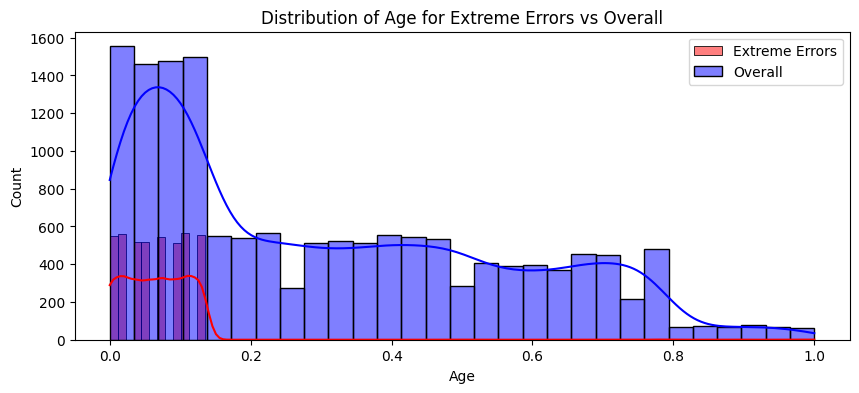

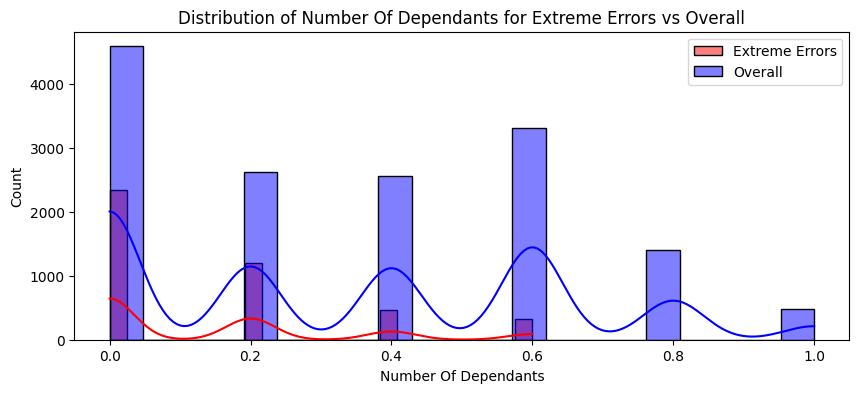

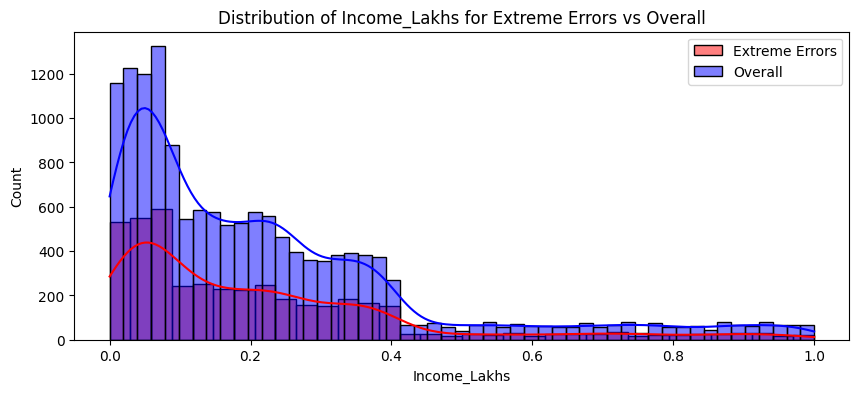

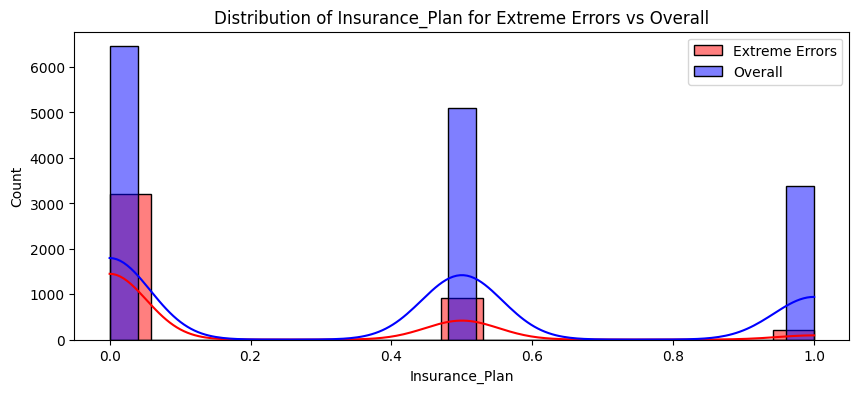

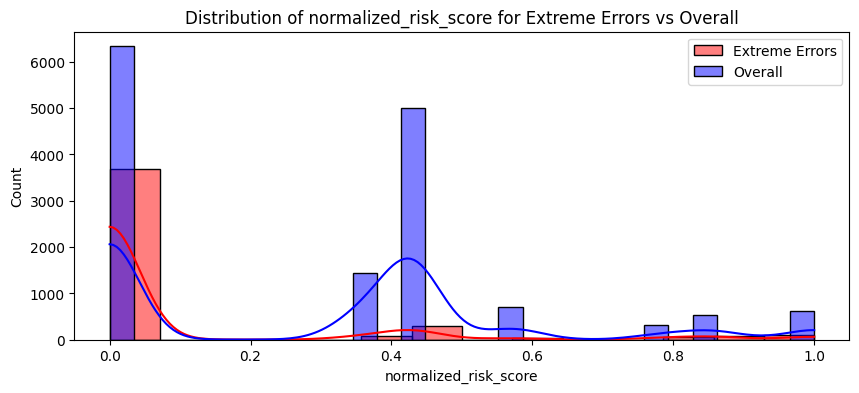

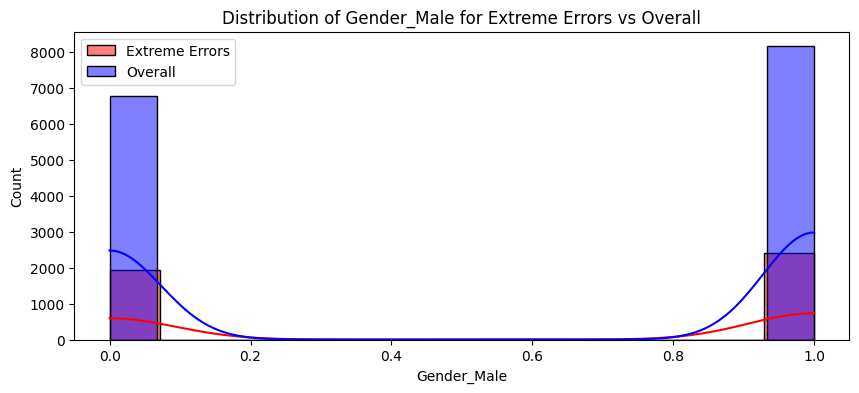

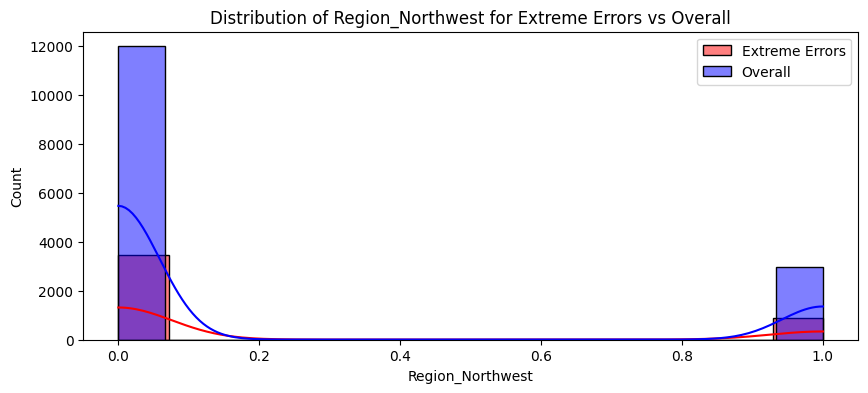

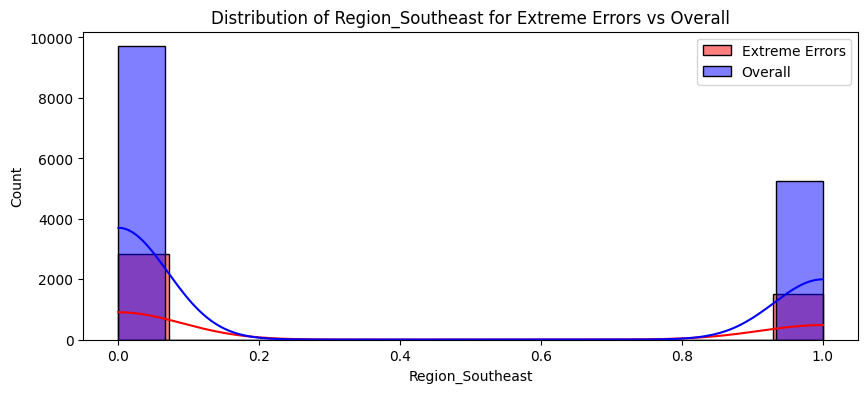

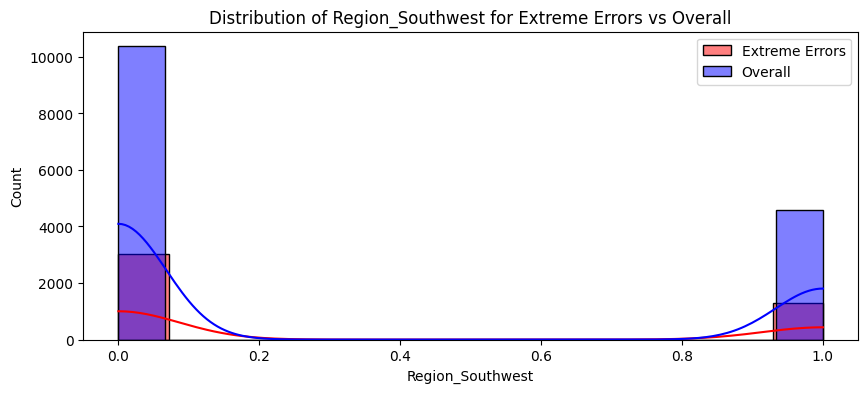

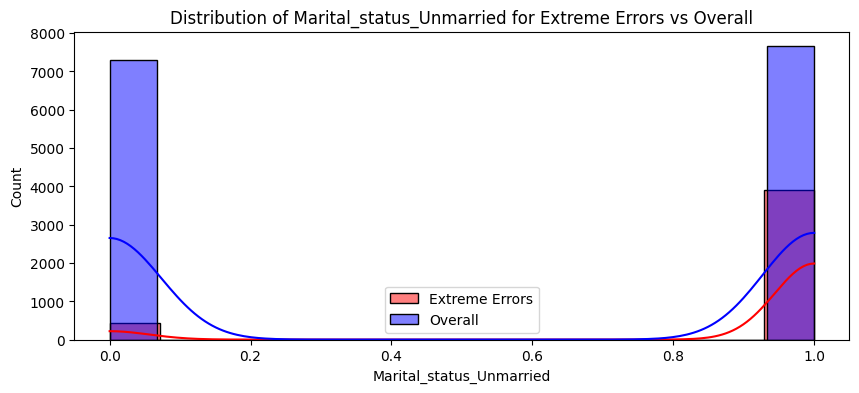

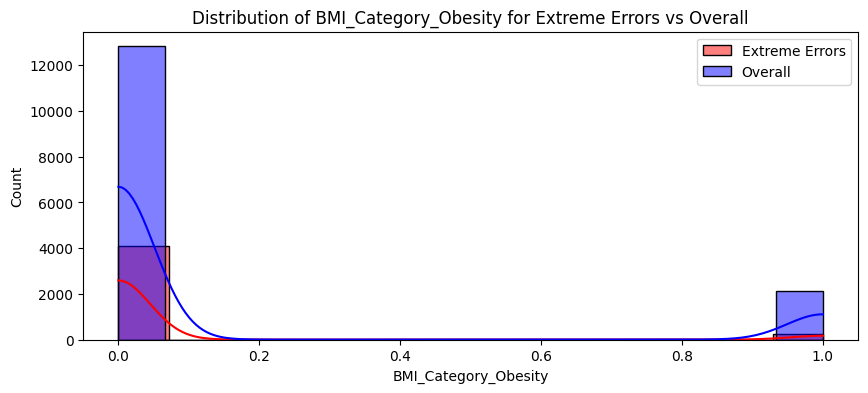

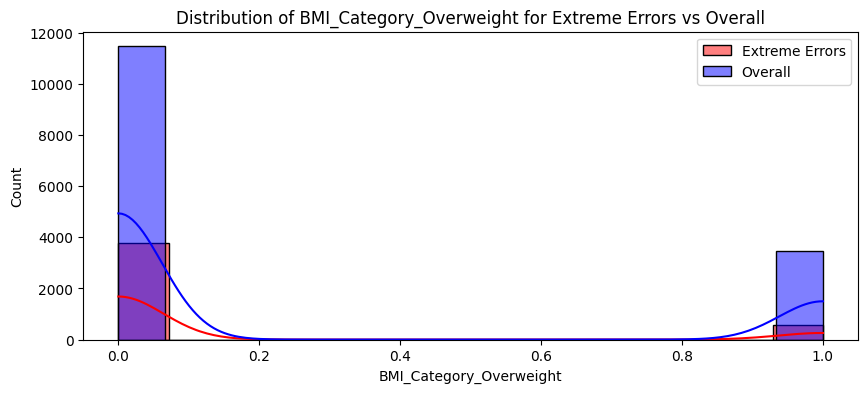

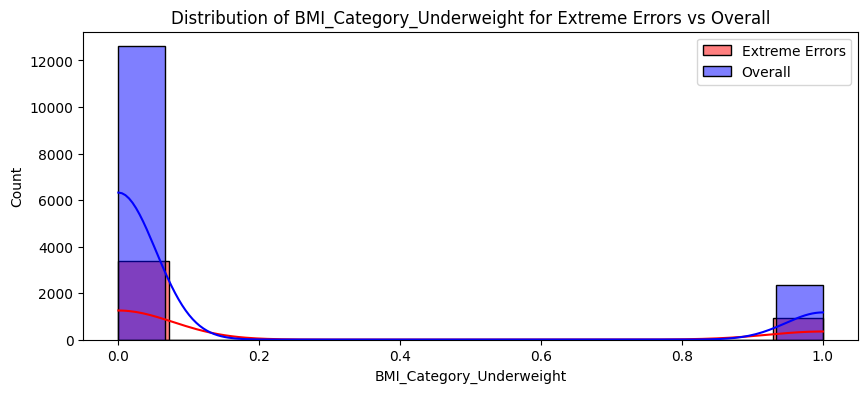

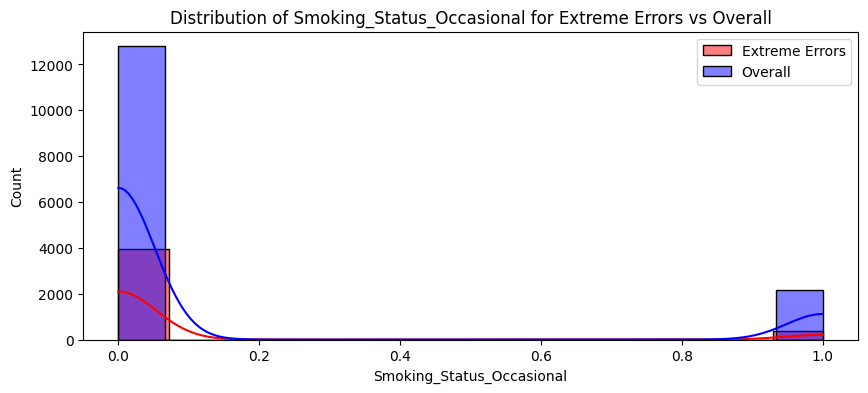

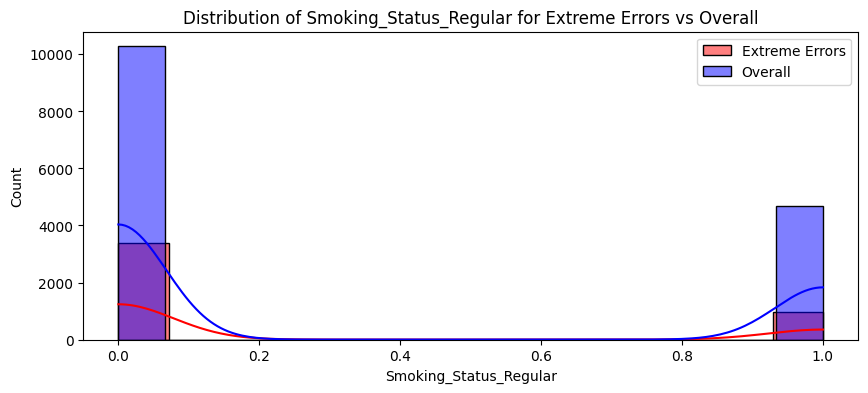

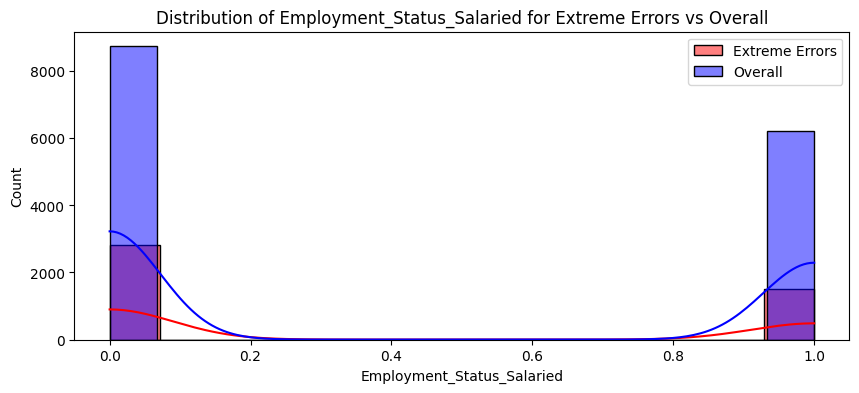

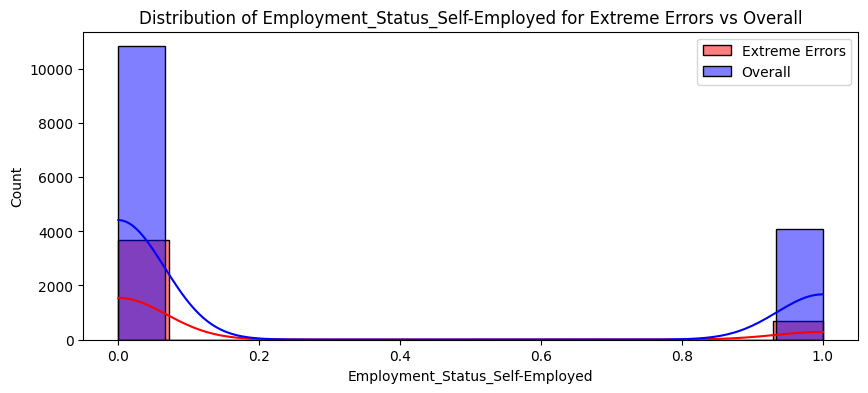

In [86]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

### Reverse Scaling

In [87]:
extreme_errors_df['Income_Level']=-1

In [88]:
df_reversed = pd.DataFrame()
df_reversed[columns_to_scale] = scaler.inverse_transform(extreme_errors_df[columns_to_scale])
df_reversed.head()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan
0,19.0,2.0,-2.0,8.0,1.0
1,22.0,1.0,-2.0,17.0,2.0
2,18.0,2.0,-2.0,5.0,1.0
3,20.0,2.0,-2.0,2.0,1.0
4,25.0,0.0,-2.0,12.0,1.0


In [89]:
df_reversed.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan
count,4336.000000,4336.000000,4336.0,4336.000000,4336.000000
mean,21.586946,0.716790,-2.0,21.799354,1.307887
std,2.966838,0.930357,0.0,21.045573,0.554726
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,7.000000,1.000000
50%,22.000000,0.000000,-2.0,16.000000,1.000000
75%,24.000000,1.000000,-2.0,31.000000,2.000000
max,72.000000,3.000000,-2.0,99.000000,3.000000


<Axes: xlabel='Age', ylabel='Count'>

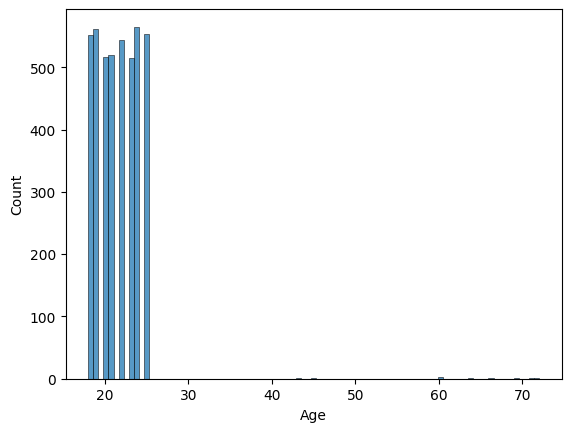

In [90]:
sns.histplot(df_reversed.Age)

This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment